layer 7, epoch 10, batchsize 32, l-lookback period, n-no of predicting days, N-no of times

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io

In [2]:
!pip install mat73
import mat73
data_dict = mat73.loadmat('/content/drive/MyDrive/mtech/project/lstm_sst/data/SST.mat')
data_array=data_dict['SST_bob_near_RM15']
data_array.shape
data_array.reshape(-1,1)
data=np.reshape(data_array,(5389,1))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
N=30
l=15#lookback
n=1#number of days predicting

In [4]:

col_mean = np.nanmean(data,axis=0)
print(col_mean)


inds = np.where(np.isnan(data))

#Place column means in the indices. Align the arrays using take
data[inds] = np.take(col_mean, inds[1])
data_sliced=data[1:4384,:]#slice of data; this data is from 1/4/2006 - 1/4/2018 

import numpy  as np

X = np.array([[-1, 2], [-0.5, 6]])

data_max_scale=np.max(data_sliced)
data_min_scale=np.min(data_sliced)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data_scaled = scaler.fit_transform(data_sliced)

features_set = []
labels = []
for i in range(l, 4383):
    features_set.append(data_scaled[i-l:i, 0])
    labels.append(data_scaled[i:i+n, 0])
    
features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1],1))

[28.63815742]


In [5]:
import tensorflow as tf
# from tf.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import concatenate
from keras.models import load_model

In [6]:
model=load_model('/content/drive/MyDrive/mtech/project/lstm_sst_2/model/model_l15n2_13_09.hdf5')

In [7]:
data_slice_test=data[4000:4414,:]
sst_testing_complete = data[4414:4414+N+n,:] #1/5/2018-
col_mean1 = np.nanmean(sst_testing_complete,axis=0)



#Find indices that you need to replace
inds = np.where(np.isnan(sst_testing_complete))

#Place column means in the indices. Align the arrays using take
sst_testing_complete[inds] = np.take(col_mean1, inds[1])

sst_total = np.concatenate((data_slice_test,sst_testing_complete), axis=0)

test_inputs = sst_total[len(sst_total) - len(sst_testing_complete) - l:] #this is sst total[4383 to end]
#print(test_inputs,sst_total)

In [8]:
def min_max_scale(X, range=(0, 1)):
    mi, ma = range
    X_std = (X - data_min_scale) / (data_max_scale - data_min_scale)
    X_scaled = X_std #* (ma - mi) + mi
    return X_scaled

test_inputs1 = test_inputs.reshape(-1,1)
test_inputs11=min_max_scale(test_inputs1)

In [9]:
#test_inp=test_inputs[7:8]

#print(test_inputs[0:7])
'''predictions1=model.predict(test_inputs[0].reshape(-1,1))
predictions1=scaler.inverse_transform(predictions1)
print(predictions1)'''



'predictions1=model.predict(test_inputs[0].reshape(-1,1))\npredictions1=scaler.inverse_transform(predictions1)\nprint(predictions1)'

In [10]:
pred=[]
predictions1=0

test_inputs=np.copy(test_inputs11)
for i in range(l,l+N+n):

  trial=test_inputs11[i-l:i,0].reshape(1,-1)
  #print(trial)
  '''predictions1=model.predict(trial)
  prediction=predictions1[6].reshape(-1,1)#need to change 7output model to single output
  pred.append(prediction)'''
  predictions1=model.predict(trial)
  predictions2=predictions1[:,0].reshape(-1,1)#modification done when model output shape changed to n.
  prediction=predictions2[0].reshape(-1,1)#need to change 7output model to single output
  pred.append(prediction)

  if len(pred)>n:
    test_inputs11[i-n]=test_inputs[i-n] #assigning real values back
  test_inputs11[i]=prediction
  print(trial,prediction)

  

1/1 [==============================] - 1s 1s/step
[[0.76218604 0.79172825 0.74593808 0.72082729 0.75184635 0.74593808
  0.73855239 0.75627777 0.74446094 0.7680946  0.7429838  0.7680946
  0.81388476 0.77400287 0.82274731]] [[1.]]
1/1 [==============================] - 0s 19ms/step
[[0.79172825 0.74593808 0.72082729 0.75184635 0.74593808 0.73855239
  0.75627777 0.74446094 0.7680946  0.7429838  0.7680946  0.81388476
  0.77400287 0.82274731 0.78729683]] [[1.]]
1/1 [==============================] - 0s 20ms/step
[[0.74593808 0.72082729 0.75184635 0.74593808 0.73855239 0.75627777
  0.74446094 0.7680946  0.7429838  0.7680946  0.81388476 0.77400287
  0.82274731 0.78729683 0.79468253]] [[1.]]
1/1 [==============================] - 0s 21ms/step
[[0.72082729 0.75184635 0.74593808 0.73855239 0.75627777 0.74446094
  0.7680946  0.7429838  0.7680946  0.81388476 0.77400287 0.82274731
  0.78729683 0.79468253 0.74150666]] [[1.]]
1/1 [==============================] - 0s 23ms/step
[[0.75184635 0.74593808

In [11]:
pred=np.array(pred).reshape(-1,1)
predictions=scaler.inverse_transform(pred)
print(predictions)

[[31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]
 [31.639997]]


In [12]:
print(sst_testing_complete)

[[30.19999886]
 [30.25      ]
 [29.88999939]
 [30.51000023]
 [30.5       ]
 [30.47999954]
 [30.39999962]
 [30.48999977]
 [30.62999916]
 [30.84000015]
 [30.86999893]
 [31.13999939]
 [31.26999855]
 [31.25      ]
 [31.26000023]
 [31.26000023]
 [31.37999916]
 [31.04999924]
 [31.07999992]
 [31.29999924]
 [31.67000008]
 [31.14999962]
 [31.22999954]
 [30.95999908]
 [31.15999985]
 [30.82999992]
 [30.63999939]
 [29.81999969]
 [30.13999939]
 [29.84999847]
 [30.03999901]]


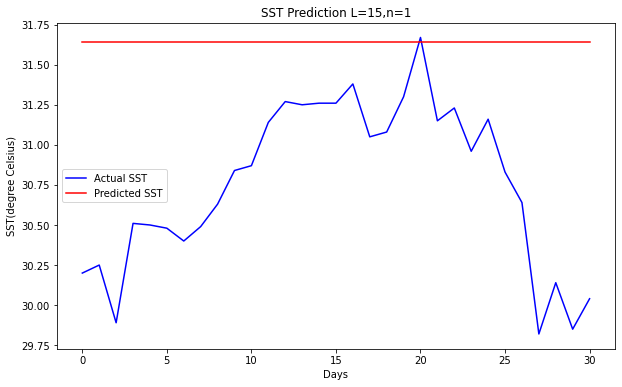

In [13]:
#import datetime
#import matplotlib.pyplot as pylt
plt.figure(figsize=(10,6))
plt.plot(sst_testing_complete, color='blue', label='Actual SST')

plt.plot(predictions , color='red', label='Predicted SST')
plt.title("SST Prediction L=%d,n=%d"%(l,n))
plt.xlabel('Days')
#pylt.set_xlim([datetime.date(2018, 5, 1), datetime.date(2018, 5, 30)])
plt.ylabel('SST(degree Celsius)')
plt.legend()
plt.show()